In [7]:
import numpy as np
from scipy.optimize import minimize


def func(t,w1, w2, w3, w4,w5):
    return w1*np.exp(-w2 * t) * np.cos(w3 * t) + w4*np.sin(t) + w5*np.cos(t)

def f(w1, w2, w3, w4,w5,t):
    return w1*np.exp(-w2 * t) * np.cos(w3 * t) + w4*np.sin(t) + w5*np.cos(t)

t_data = np.linspace(0, 1, 50)
target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]


def loss(params):
    w1,w2, w3, w4,w5 = params
    fitted_values = func(t_data,w1, w2, w3, w4,w5)
    return np.sum((fitted_values - target_values) ** 2)


initial_params = [1.0, 1.0, 0.1,0.1,0.1]


result = minimize(loss, initial_params, method='Nelder-Mead')

opt_w1,opt_w2, opt_w3, opt_w4,opt_w5 = result.x

print(func(0,opt_w1,opt_w2,opt_w3,opt_w4,opt_w5))
print(f(opt_w1,opt_w2, opt_w3, opt_w4,opt_w5,0))
print("Optimized w2:", opt_w2)
print("Optimized w3:", opt_w3)
print("Optimized w4:", opt_w4)
print('[',opt_w1,',',opt_w2,',',opt_w3,',',opt_w4,',',opt_w5,']')


-0.10564653075319724
-0.10564653075319724
Optimized w2: 1.6278233681841594
Optimized w3: -0.05992067931253551
Optimized w4: 0.173421644359757
[ -0.4163907468183215 , 1.6278233681841594 , -0.05992067931253551 , 0.173421644359757 , 0.31074421606512426 ]


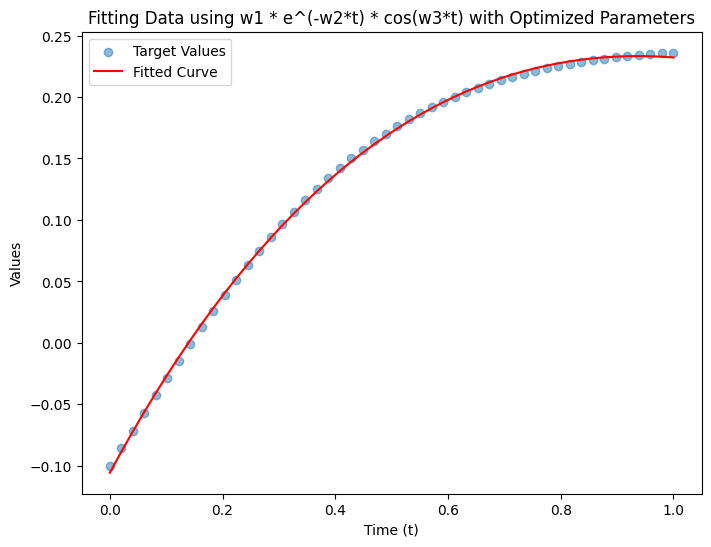

In [8]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, target_values, label='Target Values', alpha=0.5)
fitted_values = func(t_data,opt_w1, opt_w2, opt_w3, opt_w4,opt_w5)
plt.plot(t_data, fitted_values, 'r', label='Fitted Curve')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data using w1 * e^(-w2*t) * cos(w3*t) with Optimized Parameters')
plt.show()
